In [1]:
import numpy as np
import matplotlib.pyplot as plt
from GWpyxel.processing import Pyxel
import glob
from GWpyxel.utils import *
from GWpyxel.const import *

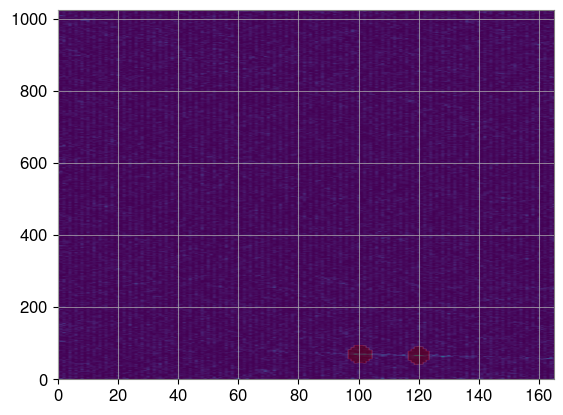

anomaly_score  glitch_score  significance  freq_start  freq_end  duration
0       0.150525      0.144479      0.012700       104.0     158.0      30.0
1       0.200020      0.163693      0.017769       112.0     164.0      36.0

In [43]:
from gwpy.segments import SegmentList
from gwosc.timeline import get_segments
import numpy as np
import matplotlib.pyplot as plt
from GWpyxel.processing import Pyxel


pyxel = Pyxel()
pyxel.fetch_data('H1',start=float(1256663958),
                 duration=1000.0,verbose=True,cache=True,source='LIGO')
pyxel.fetch_data('L1',start=float(1256663958),
                 duration=1000.0,verbose=True,cache=True,source='LIGO')
pyxel.config.tfmap.tres = 6
pyxel.config.tfmap.fres = 2
pyxel.inject_waveform(f'CM09long', delay=200,
                      right_ascension = 2.67,
                      declination=0.491,
                      polarization=4.549461,
                      catalog='/home/fays/Desktop/Projects/LongDurationWaveforms/LongDurationWaveforms/',
                      SNR=115)



pyxel.generate_tfmap()
pyxel.run_albus(version=1)
pyxel.find_candidates()
pyxel.plot()
pyxel.candidates[['anomaly_score',
                                         'glitch_score','significance',
                                         'freq_start','freq_end',
                                         'duration',]]

0.01131992
0.020493861


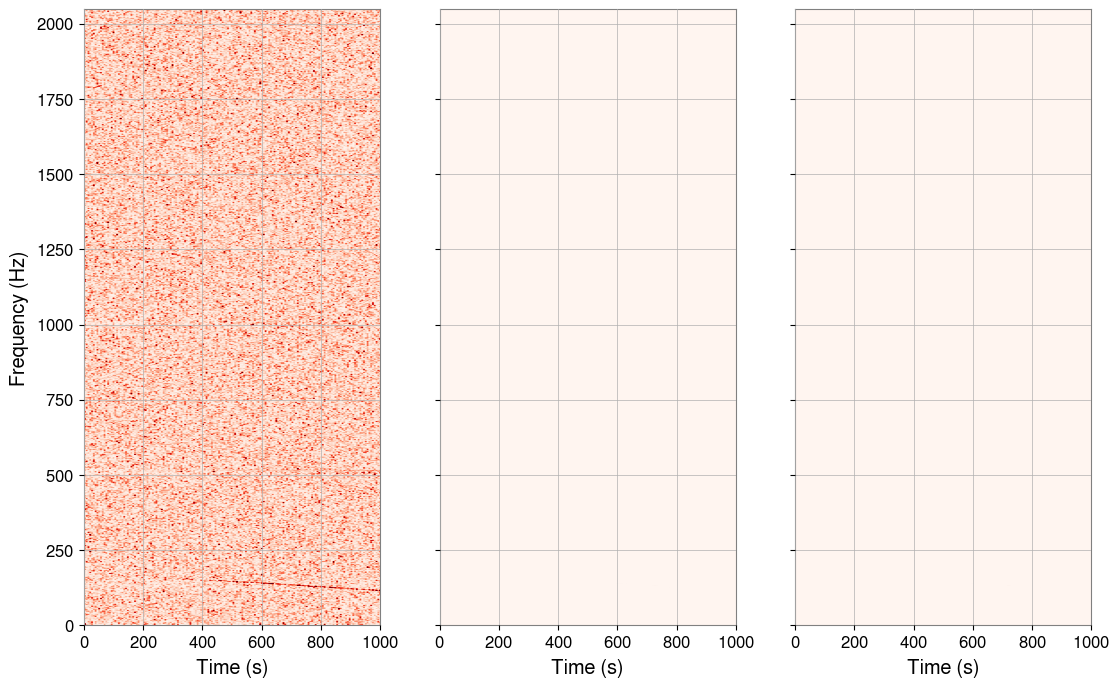

In [44]:
input_map = pyxel.spectrogram.value[:,::-1]
anomaly_map = pyxel.TFmap[::-1,:]
glitch_map = pyxel.Glitch[::-1,:]

from_freq = 0
to_freq = 2048

index_from = 1025 - int(to_freq/2)
index_to = 1025 - int(from_freq/2)

f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True)
f.set_size_inches(13,8)
ax1.imshow( np.swapaxes(input_map[:,index_from:index_to],0,1), aspect='auto', 
          extent=[0,1000,from_freq,to_freq], cmap='Reds', vmin=0, vmax=np.percentile(input_map,99.5))
ax2.imshow( anomaly_map[:,index_from:index_to], aspect='auto', 
          extent=[0,1000,from_freq,to_freq], cmap='Reds', vmin=0, vmax=1.0)
ax3.imshow( glitch_map[:,index_from:index_to], aspect='auto', 
          extent=[0,1000,from_freq,to_freq], cmap='Reds', vmin=0, vmax=1.0)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('Time (s)')
ax2.set_xlabel('Time (s)')
ax3.set_xlabel('Time (s)')

print(anomaly_map.max())
print(glitch_map.max())

In [27]:
!ls /home/fays/Desktop/Projects/LongDurationWaveforms/LongDurationWaveforms/

adi_A_tapered_4096Hz.dat	    monoB_4096Hz.dat
adi_B_tapered_4096Hz.dat	    monoC_4096Hz.dat
adi_C_tapered_4096Hz.dat	    monoH_4096Hz.dat
adiD_4096Hz.dat			    monoL_4096Hz.dat
adi_D_tapered_4096Hz.dat	    NCSACAM_A_tapered_4096Hz.dat
adi_E_tapered_4096Hz.dat	    NCSACAM_B_tapered_4096Hz.dat
adi_F_tapered_4096Hz.dat	    NCSACAM_C_tapered_4096Hz.dat
bbh_A_4096Hz.dat		    NCSACAM_D_tapered_4096Hz.dat
bns_A_4096Hz.dat		    NCSACAM_E_tapered_4096Hz.dat
CM09long_tapered_4096Hz.dat	    NCSACAM_F_tapered_4096Hz.dat
ebbh_30_40_0.9_tapered_4096Hz.dat   NCSACAM_G_tapered_4096Hz.dat
GRBPlateauA_tapered_4096Hz.dat	    NCSACAM_H_tapered_4096Hz.dat
GRBPlateauB_tapered_4096Hz.dat	    NCSACAM_I_tapered_4096Hz.dat
GRBPlateauC_tapered_4096Hz.dat	    PT_A_tapered_4096Hz.dat
GRBPlateauD_tapered_4096Hz.dat	    PT_B_tapered_4096Hz.dat
GRBPlateauE_tapered_4096Hz.dat	    quadA_4096Hz.dat
GRBPlateauF_tapered_4096Hz.dat	    quadB_4096Hz.dat
GRBplateauShort_tapered_4096Hz.dat  sgA_4096Hz.dat
ISCOchirpA_4096Hz.da

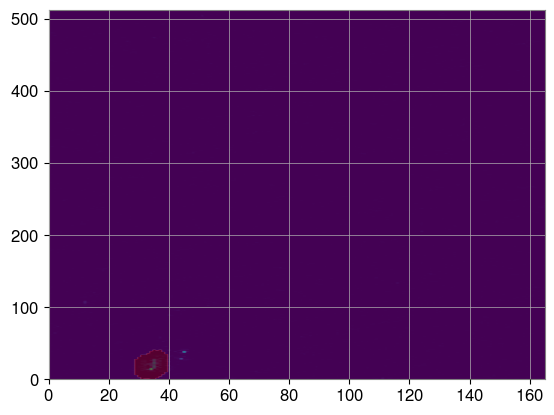

anomaly_score  glitch_score  significance  freq_start  freq_end  duration
0       3.036724     14.630337     10.977655        20.0     140.0      54.0

In [107]:
from gwpy.segments import SegmentList
from gwosc.timeline import get_segments
import numpy as np
import matplotlib.pyplot as plt
from GWpyxel.processing import Pyxel


pyxel = Pyxel()
pyxel.fetch_data('H1',start=float(1256663958),
                 duration=1000.0,verbose=True,cache=True,source='LIGO')
pyxel.fetch_data('L1',start=float(1256663958),
                 duration=1000.0,verbose=True,cache=True,source='LIGO')
pyxel.config.tfmap.tres = 6
pyxel.config.tfmap.fres = 4
pyxel.inject_waveform(f'NCSACAM_F', delay=200,
                      right_ascension = 2.67,
                      declination=0.491,
                      polarization=4.549461,
                      catalog='/home/fays/Desktop/Projects/LongDurationWaveforms/LongDurationWaveforms/',
                      SNR=45)

#pyxel.inject_waveform(f'chirp_r~4~50~450~hyperbolic~0.1', delay=300,
#                      SNR=250)

pyxel.generate_tfmap()
pyxel.run_albus(version=2)
pyxel.find_candidates()
pyxel.plot()
pyxel.candidates[['anomaly_score',
                                         'glitch_score','significance',
                                         'freq_start','freq_end',
                                         'duration',]]

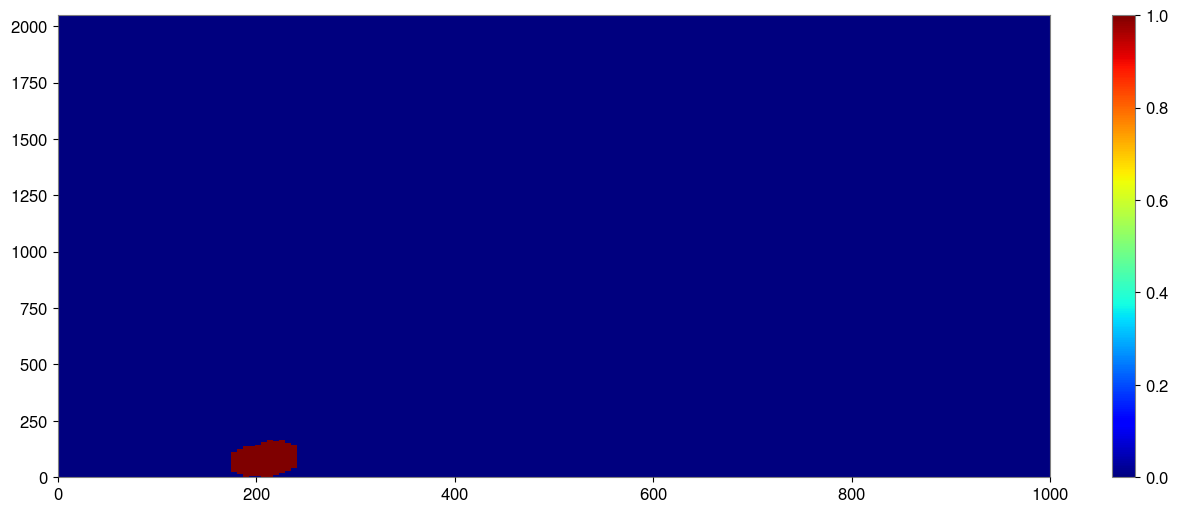

In [108]:


plt.figure(figsize=(16,6))
plt.imshow(pyxel.skeleton,origin='lower',aspect='auto', cmap='jet',extent=[0,1000,0,2048],interpolation='none',)
plt.colorbar()
plt.grid(None)


0.24822626
0.9935175


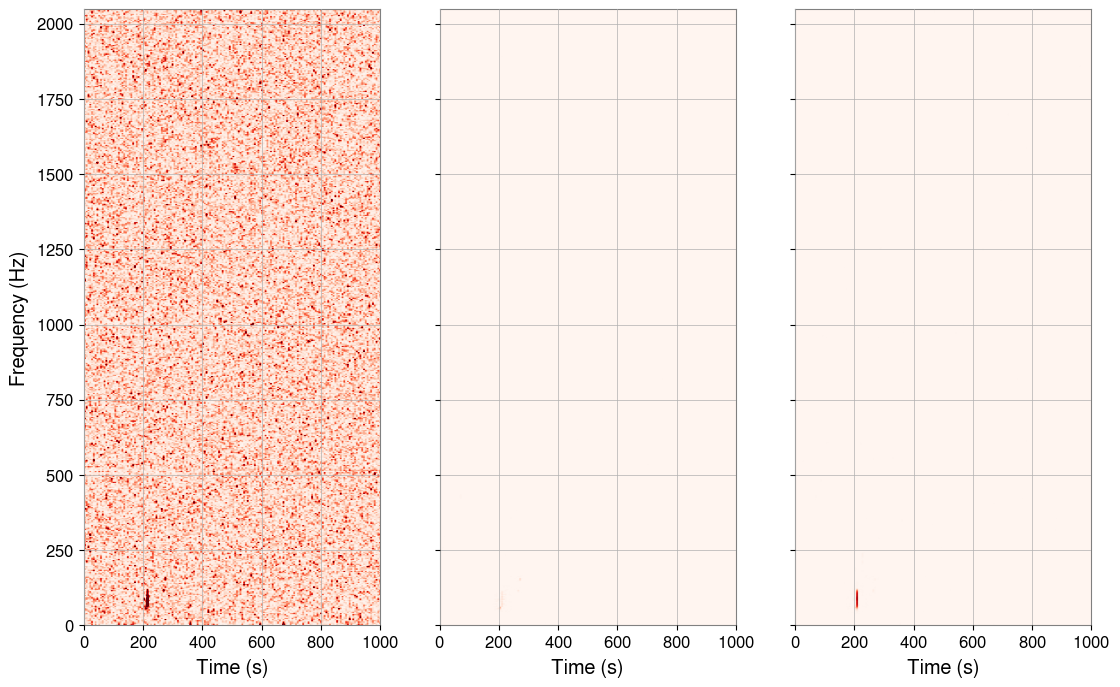

In [112]:
input_map = pyxel.spectrogram.value[:,::-1]
anomaly_map = pyxel.TFmap[::-1,:]
glitch_map = pyxel.Glitch[::-1,:]

from_freq = 0
to_freq = 2048

index_from = 1025 - int(to_freq/2)
index_to = 1025 - int(from_freq/2)

f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True)
f.set_size_inches(13,8)
ax1.imshow( np.swapaxes(input_map[:,index_from:index_to],0,1), aspect='auto', 
          extent=[0,1000,from_freq,to_freq], cmap='Reds', vmin=0, vmax=np.percentile(input_map,99.5))
ax2.imshow( anomaly_map[:,index_from:index_to], aspect='auto', 
          extent=[0,1000,from_freq,to_freq], cmap='Reds', vmin=0, vmax=1.0)
ax3.imshow( glitch_map[:,index_from:index_to], aspect='auto', 
          extent=[0,1000,from_freq,to_freq], cmap='Reds', vmin=0, vmax=1.0)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('Time (s)')
ax2.set_xlabel('Time (s)')
ax3.set_xlabel('Time (s)')

print(anomaly_map.max())
print(glitch_map.max())

In [113]:
pyxel.candidates.rapport_score

0    1.103822
Name: rapport_score, dtype: float32

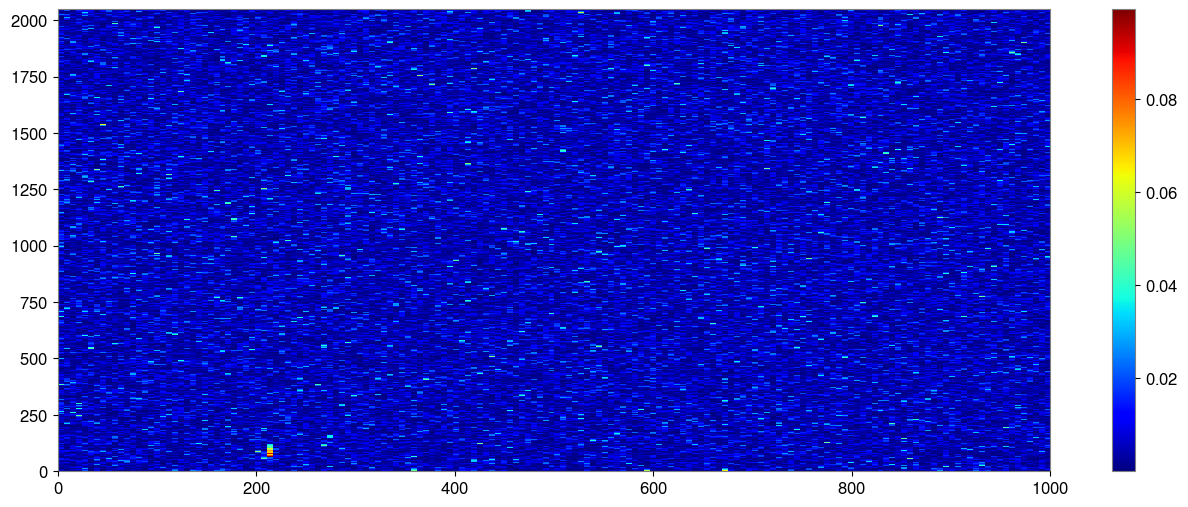

In [111]:
plt.figure(figsize=(16,6))
plt.imshow(np.swapaxes(pyxel.spectrogram.value,0,1),origin='lower',aspect='auto', cmap='jet',extent=[0,1000,0,2048],interpolation='none',)
plt.colorbar()
plt.grid(None)


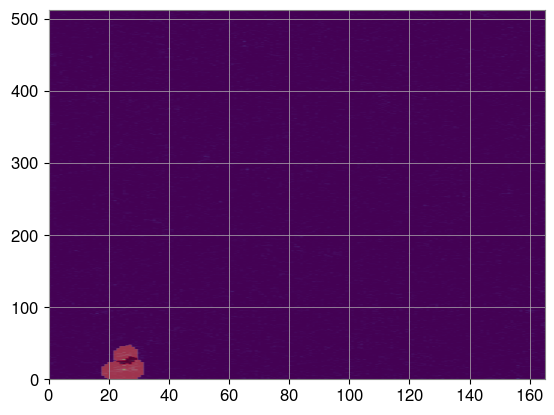

anomaly_score  glitch_score  significance  freq_start  freq_end  duration
0       0.600617      4.582281      0.260179        16.0     104.0      72.0
1       0.305702      3.458788      0.041400       108.0     168.0      36.0

In [69]:
from gwpy.segments import SegmentList
from gwosc.timeline import get_segments
import numpy as np
import matplotlib.pyplot as plt
from GWpyxel.processing import Pyxel


pyxel = Pyxel()
pyxel.fetch_data('H1',start=float(1253280809),
                 duration=1000.0,verbose=True,cache=True,source='LIGO')
pyxel.fetch_data('L1',start=float(1252945302),
                 duration=1000.0,verbose=True,cache=True,source='LIGO')
pyxel.config.tfmap.tres = 6
pyxel.config.tfmap.fres = 4

pyxel.generate_tfmap()
pyxel.run_albus(version=2)
pyxel.find_candidates()
pyxel.plot()
pyxel.candidates[['anomaly_score',
                                         'glitch_score','significance',
                                         'freq_start','freq_end',
                                         'duration',]]

In [70]:
pyxel.candidates.rapport_score

0    2.261603
1    0.380726
Name: rapport_score, dtype: float32

0.058831956
0.4933107


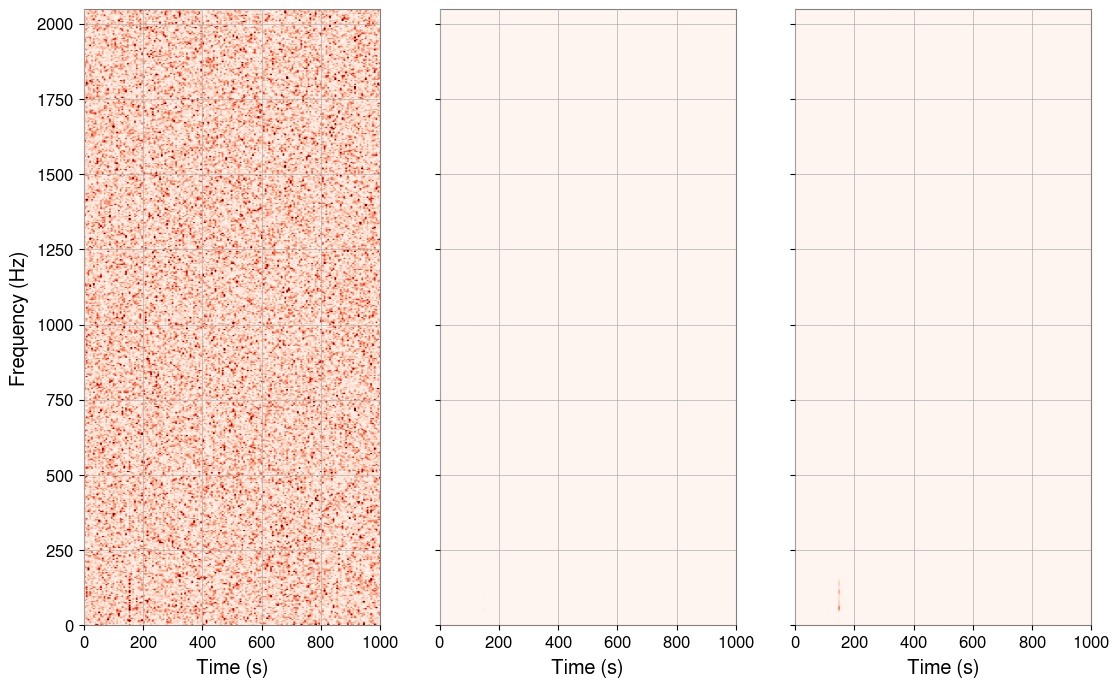

In [72]:
input_map = pyxel.spectrogram.value[:,::-1]
anomaly_map = pyxel.TFmap[::-1,:]
glitch_map = pyxel.Glitch[::-1,:]

from_freq = 0
to_freq = 2048

index_from = 1025 - int(to_freq/2)
index_to = 1025 - int(from_freq/2)

f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True)
f.set_size_inches(13,8)
ax1.imshow( np.swapaxes(input_map[:,index_from:index_to],0,1), aspect='auto', 
          extent=[0,1000,from_freq,to_freq], cmap='Reds', vmin=0, vmax=np.percentile(input_map,99.5))
ax2.imshow( anomaly_map[:,index_from:index_to], aspect='auto', 
          extent=[0,1000,from_freq,to_freq], cmap='Reds', vmin=0, vmax=1.0)
ax3.imshow( glitch_map[:,index_from:index_to], aspect='auto', 
          extent=[0,1000,from_freq,to_freq], cmap='Reds', vmin=0, vmax=1.0)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('Time (s)')
ax2.set_xlabel('Time (s)')
ax3.set_xlabel('Time (s)')

print(anomaly_map.max())
print(glitch_map.max())